# CS5242 Project: Search Real-world Image For Sketches

__Group 15:__ 
- Wu Zhanxin (A0250605N)
- Guo Peihan (A0248746N)
- Fan Yehan (A0255928N)

---
To download our dataset and Pretrianed Model, please go to our google drive page.\
Raw Image Dataset: https://drive.google.com/drive/folders/1mcvubLGu17ZVKTGvG_nKS-u00cKZjaGo?usp=share_link \
Proprocessed Dataset: https://drive.google.com/drive/folders/1mBAQHd7LpmIkIQUAmsPUjsbVWdUhq991?usp=sharing \
Pretrianed Model: https://drive.google.com/drive/folders/1qVvAIaXa6U-0eh0fJ_9kNX9IGAFfC7S6?usp=share_link 

You are recommendeded to download *proprocessed dataset*, since our all models are trained based it.

We include small pretrained model in the submitted zip file, only resnet and vgg16 pretrained model are on google drive. 


**IMPORTANT NOTICE**: 

You can run this notebook **WITHOUT** download anything from google drive! 

- Please make sure the **torchsummary** Library is in the latest version and can accept None input_size, otherwise it may stuck in printing model structure.

We compress all necessary functions and class for this report notebook in visualization.py file.

```
from visualization import *
```

After running the above code, you can directly run this notebook to check our results. For training procress of each model and sketch-based search engine demo we proposed, please refer to README.txt and other notebooks.


In [1]:
from visualization import *

## 1. Introduction

Over the past few years, Quickdraw achieves high accuracy on guessing what people are drawing by neuron network. Inspired by its outstanding performance, we realize that sketch images with few lines contain important content. Under this circumstance, people can convey their simple ideas via drawing, which may help people deal with language difficulties. Thus, it would be interesting and important to study how to utilize limited information in sketches.


In this project, we try to implement sketch-based image search engine in our dataset for the user-drawn sketch. Specifically, we explore good representations for sketches and how to find similar features in real-world images. In particular, we will focus on fruit sketches and real-world images including seven classes: apple, banana, strawberry, pear, watermelon, grape, and pineapple. We try MLP, ResNet, VGG, Inception, CNN and CNN with contrastive loss to extract features in real-world fruit images and sketches. Based on similarity among image features, we implement a search engine to output top-k similar real-world images for sketch images.

The pipeline of our project is as follows:

1. We identified the problem of searching real-world images for sketches.
2. We scraped 10k raw real-world fruit images by Fliskr API and collected 5k sketch images by quickdraw API in python.
3. We explore the data by visualizing real-world images and sketch images, doing statist analysis on images shape, and so on.
4. We implemented MLP, ResNet, VGG, Inception, CNN and CNN with contrastive loss to extract features in real-world fruit images and sketches.
5. We reported data analysis and compared different model, please check the following sections in the report.
6. We present our project in this notebook and the presentation video. 



&nbsp;
&nbsp;




Here is the demo of our sketch-based image search engine:


![demo](./fig/demo.png)

## 2. Methodology

### 2.1 Problem Formulation

In this project, we aim to implement a sketch-based image search engine that can return $k$ real-world fruit images for user-input sketch. In order to match real-world image and sketches, the key is to find good representations for them. Therefore, we tried to use models ($M$) to extract features from images and compute the similarities among features. For each user-input sketch, we output top $k$ real-world images with highest similarities.

### 2.2 Proposed Method

To solve the proplems, we propose to use Neural Network to extract features in images and compute cosine similarities for image features. In this project, two models ($M_{realworld}$) and ($M_{sketch}$) are trained to find good representations for real-world image and sketch image. For($M_{realworld}$) and ($M_{sketch}$), we tried MLP, ResNet, VGG, Inception and CNN to solve the problem. We analyze these model performance in the following sections. 


![demo](./fig/methodology.png)

## 3. Dataset Description

### 3.1 Data Collection
In this part, we utilizes Flickr API and
Python QuickDraw API to collect our real fruit images and sketch images to form the raw dataset.

1. You could choose review our original dataset in the sharing google colab folder( sketch dataset: https://drive.google.com/drive/folders/1FLoXaT7Tm6fAHR6GUCu6z1ima8c73yip?usp=share_link  realworld dataset:https://drive.google.com/drive/folders/1WAGt4RQs6WvtIAPwVAYR_86Jzy-Apidt?usp=share_link ) or rerun the code in 'data_collection.ipynb' to get the images.
 
 
 
2. Raw dataset size: 
*   quickdraw data: 10000 images per category
*   real image data(some url download falied) Apple: 9396 banana: 9097 strawberry: 9039 Pear: 8957 watermelon: 8962 grapes: 9332
Pineapple: 9080 





#### 3.1.1 Real-world dataset 


 Acquire Image Links
1. Using “flickr.walk” to returns an iterable object
2. We don’t want to download any image that is too small, and also sometimes it’s not available in certain size. Here we only query choose images in Medium size url_c: Medium 800 (800 × 572)

![realworld](./fig/realworld.png)

#### 3.1.2 QuickDraw dataset 
After collecting the real fruit images dataset, we use another API  `quickdraw` to access the Google Quick, Draw! data [quickdraw.withgoogle.com/data](https://quickdraw.withgoogle.com/data)

Drawings are returned as QuickDrawing objects which exposes the properties of the drawing.
Open a group of Quick Draw drawings using QuickDrawDataGroup passing the name of the drawing.

![realworld](./fig/quickdraw.png)

### 3.2 Data Exploration

In this section, we visualize and analyze the collected data, which will give some insights on how to prepocess the data in the next step.

![data_explore](./fig/data_explore.png)

1. Statistics of the number of images collected from quickdraw API and Flickr API.

The figure shows the comparison of the number of corrected fetched images between Quickdraw API and Flickr API. The number of images collected from quickdraw API for each fruit class is 10000, indicating that all images are corrected fetched from Quickdraw API. While the number of images collected from Flickr API for each fruit class is less than 10000, indicating that some images are failed to fetch.

2. Statistics of the size (width, length) of images collected from quickdraw API and  Flickr API.

The figures of width and height distribution in the datasets indicate that images collected from quickdraw have the same size of (255,255); while sizes of images collected from Flickr are diverse and should be scaled and clipped to the same size in the later preprocessing step.

### 3.3 Data Preprocessing

In order to achieve clean datasets, we do data perprocessing for our collected images including data clean and data normalization. 

1. In data clean step, we delete gray fruit images by checking the image shape using PIL python library. Besides, we delete duplicated Images to avoid overfitting to these images. During data exploration, we observe some poor-quality images that do not contain any fruits but unrelated objects. We also delete these images to avoid noise when training model. 

2. In data normalization step, we mainly focus on balancing the image number for each fruit category and normalize all the image shape. Since we collect the real-world fruit images in seven categories (apples, pineapple, apple, banana, strawberry, pear, watermelon, grapes), we reduce the image number to 5000 for all the categories, so that we expect our model can have good performance on all the fruit catogories.

![data_preprocess](./fig/data_preprocess.png)

## 4 Model Implementation

All the training code for each model is separated in different notebooks. In this report, we load our pretrained model and show the model history results for analysis. 


### 4.1 Multilayer Perception Classification (MLP)

To extract image features, we implement MLP as a baseline. In this subsection, we will go through model strucuture, model performance (including train and validation loss and accuracy), and finally the search engine accuracy using MLP. At the end of this subsection, we analyze the model performance and compare it with other models we implemented.


#### Model Structure

The following is the model structure. Since the model architecture for real-world images and sketches are the same, we only show the MLP structure for real-world images here.

![MLP](./fig/MLP.png)

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

realworld_model = MLP(32*32*3,7).to(device)
realworld_model.load_state_dict(torch.load('./model/realworld_mlp.pth'))

quickdraw_model = MLP(32*32*3,7).to(device)
quickdraw_model.load_state_dict(torch.load('./model/quickdraw_mlp.pth'))

<All keys matched successfully>

In [3]:
print('MLP structure:')
summary(realworld_model)
print('')

MLP structure:
Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Linear: 2-1                       3,145,728
|    └─LeakyReLU: 2-2                    --
|    └─Linear: 2-3                       524,288
|    └─LeakyReLU: 2-4                    --
|    └─Linear: 2-5                       131,072
|    └─LeakyReLU: 2-6                    --
|    └─Linear: 2-7                       32,768
|    └─LeakyReLU: 2-8                    --
|    └─Linear: 2-9                       896
Total params: 3,834,752
Trainable params: 3,834,752
Non-trainable params: 0



#### Model Train and Validation Results

In [4]:
MLP_history = load_model_history('./results/MLP.pkl')

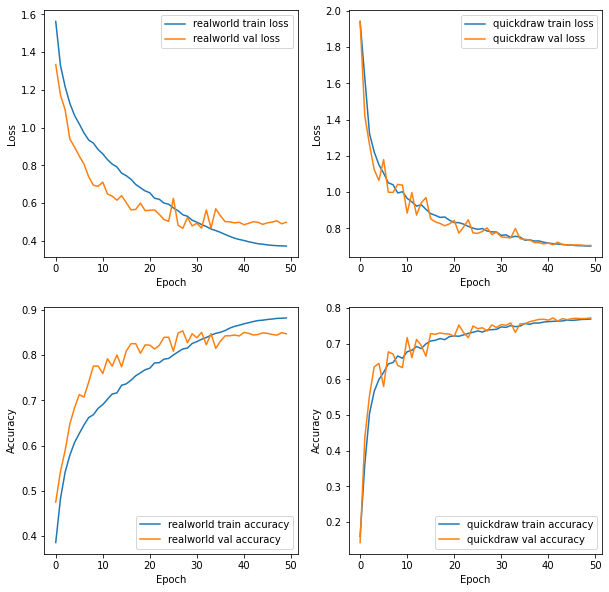

In [5]:
plot_model_history(MLP_history, plot_figure = True, txt_log = False, search_result = False, Is_CNNCL = False)

In [6]:
print('\nThe following is MLP model result:\n')
print('If you want plot more epoch results, please change the following epoch_num! \n')
plot_model_history(MLP_history, epoch_num = 5, plot_figure = False, txt_log = True, search_result = False, Is_CNNCL = False)


The following is MLP model result:

If you want plot more epoch results, please change the following epoch_num! 

--------------------------------------- Real-World Model --------------------------------------
Epoch  0 : Train Loss: 1.5622| Val Loss: 1.3338| Train Accuracy: 0.3849| Val Accuracy: 0.4744
Epoch  1 : Train Loss: 1.3302| Val Loss: 1.1740| Train Accuracy: 0.4817| Val Accuracy: 0.5419
Epoch  2 : Train Loss: 1.2165| Val Loss: 1.0946| Train Accuracy: 0.5411| Val Accuracy: 0.5891
Epoch  3 : Train Loss: 1.1287| Val Loss: 0.9404| Train Accuracy: 0.5786| Val Accuracy: 0.6477
Epoch  4 : Train Loss: 1.0648| Val Loss: 0.8976| Train Accuracy: 0.6065| Val Accuracy: 0.6837


--------------------------------------- QuickDraw Model --------------------------------------
Epoch  0 : Train Loss: 1.5622| Val Loss: 1.3338| Train Accuracy: 0.1597| Val Accuracy: 0.1429
Epoch  1 : Train Loss: 1.3302| Val Loss: 1.1740| Train Accuracy: 0.3620| Val Accuracy: 0.4366
Epoch  2 : Train Loss: 1.2165| Val


The following is MLP model result:
--------------------------------------- Search Engine Result --------------------------------------
Find Top  1  Similar Real-world Images for One Sketch: Accuracy: 0.6144
Find Top  3  Similar Real-world Images for One Sketch: Accuracy: 0.6326
Find Top  5  Similar Real-world Images for One Sketch: Accuracy: 0.6419
Find Top 10  Similar Real-world Images for One Sketch: Accuracy: 0.6469
Find Top 20  Similar Real-world Images for One Sketch: Accuracy: 0.6454




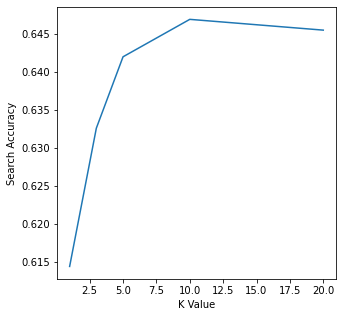

In [7]:
print('\nThe following is MLP model result:')
plot_model_history(MLP_history, plot_figure = False, txt_log = False, search_result = True, Is_CNNCL = False)

#### Model Analysis

For MLP, it needs around 50 epochs for the model to achieve its best performance. Our model achieves 84.7% in real-world image classification and 77.2% in quickdraw image classification. When we implement sketch-based image search engine using features from MLP, the search accuracy is around 61.4\%. 

We choose LeakyReLU as activation function, because it can resolve the gradient vanishing problems. Besides, we use five hidden layers based on the hyperparameter tune results we get, shown in the following (codes are in MLP.ipynb).

Since MLP only contains linear layers and activation functions, even though it can be applied on complex probelsm, its performance are limited. In this project, we use MLP as a baseline to show the improvement of our proposed models.



### 4.2 VGG16

We build the VGG16 model using the architecture in the paper.
The structure of the VGG network is very consistent, using a 3x3 convolution and a 2x2 max pooling from beginning to end.


In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
vgg16 = VGG16(7).to(device)

In [9]:
print('VGG16:')
summary(vgg16)
print('')

VGG16:
Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       1,792
|    └─BatchNorm2d: 2-2                  128
|    └─ReLU: 2-3                         --
├─Sequential: 1-2                        --
|    └─Conv2d: 2-4                       36,928
|    └─BatchNorm2d: 2-5                  128
|    └─ReLU: 2-6                         --
|    └─MaxPool2d: 2-7                    --
├─Sequential: 1-3                        --
|    └─Conv2d: 2-8                       73,856
|    └─BatchNorm2d: 2-9                  256
|    └─ReLU: 2-10                        --
├─Sequential: 1-4                        --
|    └─Conv2d: 2-11                      147,584
|    └─BatchNorm2d: 2-12                 256
|    └─ReLU: 2-13                        --
|    └─MaxPool2d: 2-14                   --
├─Sequential: 1-5                        --
|    └─Conv2d: 2-15                      295,168
|    └─BatchNorm2d: 2-16               

In [10]:
vgg16_history = load_model_history('./results/vgg16.pkl')

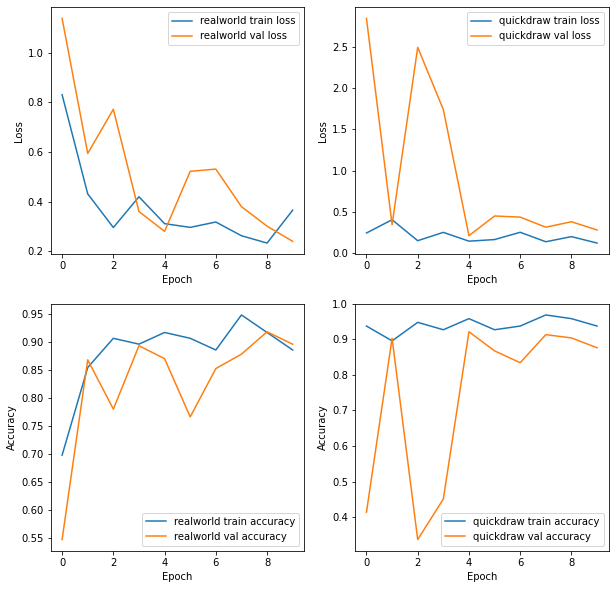

In [11]:
plot_model_history(vgg16_history, plot_figure = True, txt_log = False, search_result = False, Is_CNNCL = False)

In [12]:
print('\nThe following is vgg16 model result:\n')
print('If you want plot more epoch results, please change the following epoch_num! \n')
plot_model_history(vgg16_history, epoch_num = 5, plot_figure = False, txt_log = True, search_result = False, Is_CNNCL = False)


The following is vgg16 model result:

If you want plot more epoch results, please change the following epoch_num! 

--------------------------------------- Real-World Model --------------------------------------
Epoch  0 : Train Loss: 0.8309| Val Loss: 1.1383| Train Accuracy: 0.6979| Val Accuracy: 0.5474
Epoch  1 : Train Loss: 0.4315| Val Loss: 0.5945| Train Accuracy: 0.8542| Val Accuracy: 0.8679
Epoch  2 : Train Loss: 0.2962| Val Loss: 0.7724| Train Accuracy: 0.9062| Val Accuracy: 0.7800
Epoch  3 : Train Loss: 0.4199| Val Loss: 0.3605| Train Accuracy: 0.8958| Val Accuracy: 0.8930
Epoch  4 : Train Loss: 0.3117| Val Loss: 0.2806| Train Accuracy: 0.9167| Val Accuracy: 0.8700


--------------------------------------- QuickDraw Model --------------------------------------
Epoch  0 : Train Loss: 0.8309| Val Loss: 1.1383| Train Accuracy: 0.9375| Val Accuracy: 0.4140
Epoch  1 : Train Loss: 0.4315| Val Loss: 0.5945| Train Accuracy: 0.8958| Val Accuracy: 0.9033
Epoch  2 : Train Loss: 0.2962| V


The following is vgg16 model result:

--------------------------------------- Search Engine Result --------------------------------------
Find Top  1  Similar Real-world Images for One Sketch: Accuracy: 0.1336
Find Top  3  Similar Real-world Images for One Sketch: Accuracy: 0.1369
Find Top  5  Similar Real-world Images for One Sketch: Accuracy: 0.1351
Find Top 10  Similar Real-world Images for One Sketch: Accuracy: 0.1337
Find Top 20  Similar Real-world Images for One Sketch: Accuracy: 0.1331




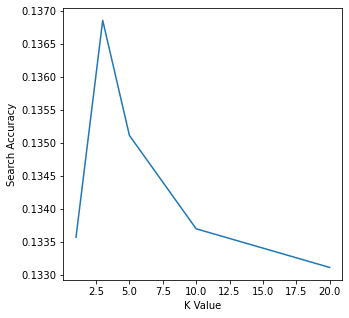

In [13]:
print('\nThe following is vgg16 model result:\n')
plot_model_history(vgg16_history, plot_figure = False, txt_log = False, search_result = True, Is_CNNCL = False)

#### Model Analysis

For VGG16 model, it needs around 10 epochs for the model to achieve its best validation accuracy which is 82.5% in real-world image classification and 70.7% in quickdraw image classification. 

From the output, we can see that the model loss is decreasing while the accuracy on the validation set is increasing with every epoch, but we also notice that it is fluctuating at the end, which could mean the model is overfitting.
 
One of the drawbacks of VGG was that it couldn't go as deep as wanted because it started to lose the generalization capability (it started overfitting)

When we use features from VGG16 to implement sketch-based image search engine , the search accuracy is lower than our expected.  VGG need more data to learning a better feature in our case.

### 4.3 ResNet

We implement ResNet32 in this section. 

We first implement the basic building block of a ResNet (ResidualBlock), and use this to build our network. It allows deeper networks to be trained without hurting performance as some layers can be skipped.

There are three blocks in the architecture, containing 3, 4, 6, and 3 layers respectively. 

To make this block, we create a helper function _make_layer. The function adds the layers one by one along with the Residual Block. After the blocks, we add the average pooling and the final linear layer.

The following is the model structure.



In [14]:
device = "cuda" if torch.cuda.is_available() else "cpu"
Resnet = ResNet(ResidualBlock, [3, 4, 6, 3]).to(device)

In [15]:
print('Resnet:')
summary(Resnet)
print('')

Resnet:
Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       9,472
|    └─BatchNorm2d: 2-2                  128
|    └─ReLU: 2-3                         --
├─MaxPool2d: 1-2                         --
├─Sequential: 1-3                        --
|    └─ResidualBlock: 2-4                --
|    |    └─Sequential: 3-1              37,056
|    |    └─Sequential: 3-2              37,056
|    |    └─ReLU: 3-3                    --
|    └─ResidualBlock: 2-5                --
|    |    └─Sequential: 3-4              37,056
|    |    └─Sequential: 3-5              37,056
|    |    └─ReLU: 3-6                    --
|    └─ResidualBlock: 2-6                --
|    |    └─Sequential: 3-7              37,056
|    |    └─Sequential: 3-8              37,056
|    |    └─ReLU: 3-9                    --
├─Sequential: 1-4                        --
|    └─ResidualBlock: 2-7                --
|    |    └─Sequential: 3-10       

In [16]:
Resnet_history = load_model_history('./results/resnet.pkl')

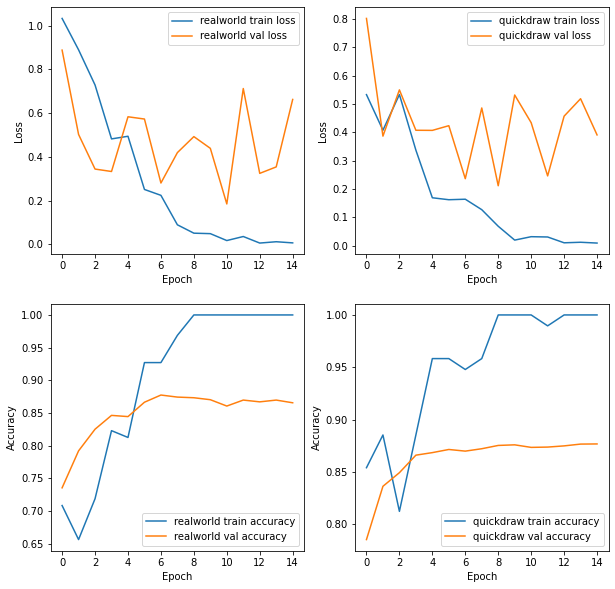

In [17]:
plot_model_history(Resnet_history, plot_figure = True, txt_log = False, search_result = False, Is_CNNCL = False)

In [18]:
print('\nThe following is ResNet model result:\n')
print('If you want plot more epoch results, please change the following epoch_num! \n')
plot_model_history(Resnet_history, epoch_num = 5, plot_figure = False, txt_log = True, search_result = False, Is_CNNCL = False)


The following is ResNet model result:

If you want plot more epoch results, please change the following epoch_num! 

--------------------------------------- Real-World Model --------------------------------------
Epoch  0 : Train Loss: 1.0334| Val Loss: 0.8884| Train Accuracy: 0.7083| Val Accuracy: 0.7354
Epoch  1 : Train Loss: 0.8899| Val Loss: 0.5027| Train Accuracy: 0.6562| Val Accuracy: 0.7920
Epoch  2 : Train Loss: 0.7289| Val Loss: 0.3443| Train Accuracy: 0.7188| Val Accuracy: 0.8251
Epoch  3 : Train Loss: 0.4823| Val Loss: 0.3332| Train Accuracy: 0.8229| Val Accuracy: 0.8463
Epoch  4 : Train Loss: 0.4944| Val Loss: 0.5835| Train Accuracy: 0.8125| Val Accuracy: 0.8444


--------------------------------------- QuickDraw Model --------------------------------------
Epoch  0 : Train Loss: 1.0334| Val Loss: 0.8884| Train Accuracy: 0.8542| Val Accuracy: 0.7856
Epoch  1 : Train Loss: 0.8899| Val Loss: 0.5027| Train Accuracy: 0.8854| Val Accuracy: 0.8364
Epoch  2 : Train Loss: 0.7289| 


The following is Resnet model result:

--------------------------------------- Search Engine Result --------------------------------------
Find Top  1  Similar Real-world Images for One Sketch: Accuracy: 0.7761
Find Top  3  Similar Real-world Images for One Sketch: Accuracy: 0.7981
Find Top  5  Similar Real-world Images for One Sketch: Accuracy: 0.8069
Find Top 10  Similar Real-world Images for One Sketch: Accuracy: 0.8183
Find Top 20  Similar Real-world Images for One Sketch: Accuracy: 0.8257




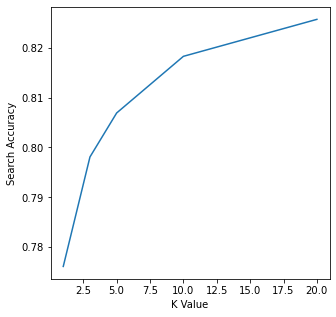

In [19]:
print('\nThe following is Resnet model result:\n')
plot_model_history(Resnet_history, plot_figure = False, txt_log = False, search_result = True, Is_CNNCL = False)

#### Model Analysis

For ResNet32 model, we set learning_rate = 0.001 batch size = 128 it needs around 15 epochs for the model to achieve its best performance. ResNet32 achieves 84.9% in real-world image classification and 77.2% in quickdraw image classification. 

We found that ResNet architecture has better inference than VGG networks in the similar training time.
 
From the loss and accuracy plots, apparently we are still facing the overfitting ploblem.
I tried to lower down the  lr and increase the batch size, adding dropout layers and 
weight decay,  weight decay improves the generalization performance of the model, by penalizing large weights, which encourages the model to learn simpler features.
Due to our small size of dataset, there is still overfitting. May be we need to do data augmentation which will help less likely to overfit the training data if we have more time. 


When we implement sketch-based image search engine using features from ResNet32, the search accuracy in top 20 gets 82.57% which is better than MLP.



### 4.4 Inception Network

In this subsection, we investigate Inception for our sketch-based image search task. We will go through model strucuture, model performance (including train and validation loss and accuracy), and finally the search engine accuracy using Inception Networks. At the end of this subsection, we analyze the model performance.

#### 4.4.1 Model Structure

##### 4.4.1.1 Inception block
Inception modules are first proposed in GoogleNet, 2014. An Inception block applies four convolution blocks separately on the same feature map: a 1x1, 3x3, and 5x5 convolution, and a max pool operation. This allows the network to look at the same data with different receptive fields. The additional 1x1 convolutions before the 3x3 and 5x5 convolutions are used for dimensionality reduction. This is especially crucial as the feature maps of all branches are merged afterward, and we don’t want any explosion of feature size. As 5x5 convolutions are 25 times more expensive than 1x1 convolutions, we can save a lot of computation and parameters by reducing the dimensionality before the large convolutions. The overall inception block is shown below. 

![Inception_block](./fig/Inception_block.png)

##### 4.4.1.2 Inception Network
The GoogleNet architecture consists of stacking multiple Inception blocks with occasional max pooling to reduce the height and width of the feature maps. The original GoogleNet was designed for image sizes of ImageNet and had almost 7 million parameters. For our specified dataset, we don’t require such a heavy architecture, and instead, apply a reduced version. We first implement the basic building block of a Inception Network (Inception blocks), and use this to build our network. 

The architecture basically consists of a feature detector and a classifier.

Before extracting features, first we use a convolution on the original image to scale up the channel size. The feature detector of the model involves stacking inception blocks followed by a max pooling layer. 

The classifier of the model then interprets the features and makes a prediction as to which class a given image belongs. First, the feature maps output from the feature extraction of the model are flattened. Second, we interpret them with one fully connected layers, and then output a prediction. 

The designed Inception Network architecture is shown as below. 

![Inception_network](./fig/Inception_network.png)

#### 4.4.2 Model Train and Validation Results

In [20]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
Inception =Inception().to(device)

In [21]:
print('Inception Stucture:')
summary(Inception)
print('')

Inception Stucture:
Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       1,792
|    └─BatchNorm2d: 2-2                  128
|    └─ReLU: 2-3                         --
├─Sequential: 1-2                        --
|    └─InceptionBlock: 2-4               --
|    |    └─Sequential: 3-1              1,072
|    |    └─Sequential: 3-2              11,456
|    |    └─Sequential: 3-3              4,296
|    |    └─Sequential: 3-4              536
|    └─InceptionBlock: 2-5               --
|    |    └─Sequential: 3-5              1,608
|    |    └─Sequential: 3-6              16,112
|    |    └─Sequential: 3-7              5,908
|    |    └─Sequential: 3-8              804
|    └─MaxPool2d: 2-6                    --
|    └─InceptionBlock: 2-7               --
|    |    └─Sequential: 3-9              2,376
|    |    └─Sequential: 3-10             17,136
|    |    └─Sequential: 3-11             6,420
|    |    └─Seq

In [22]:
Inception_history = load_model_history('./results/Inception.pkl')

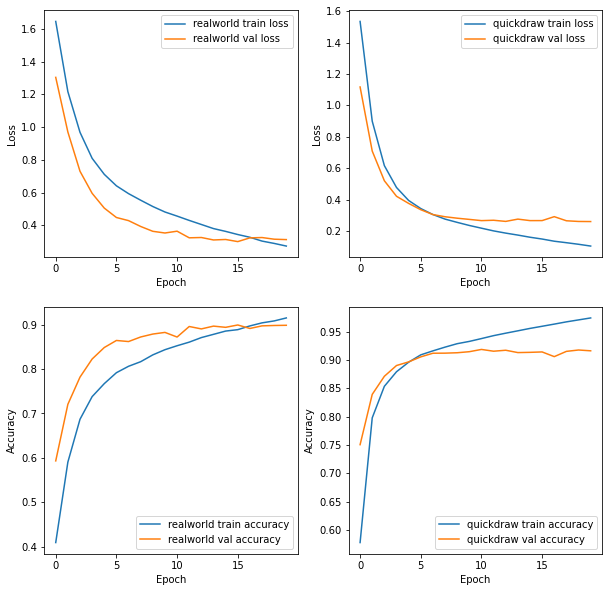

In [23]:
plot_model_history(Inception_history, plot_figure = True, txt_log = False, search_result = False, Is_CNNCL = False)

In [24]:
print('\nThe following is Inception model result:\n')
print('If you want plot more epoch results, please change the following epoch_num! \n')
plot_model_history(Inception_history, epoch_num = 5, plot_figure = False, txt_log = True, search_result = False, Is_CNNCL = False)


The following is Inception model result:

If you want plot more epoch results, please change the following epoch_num! 

--------------------------------------- Real-World Model --------------------------------------
Epoch  0 : Train Loss: 1.6455| Val Loss: 1.3037| Train Accuracy: 0.4096| Val Accuracy: 0.5933
Epoch  1 : Train Loss: 1.2164| Val Loss: 0.9698| Train Accuracy: 0.5906| Val Accuracy: 0.7206
Epoch  2 : Train Loss: 0.9679| Val Loss: 0.7298| Train Accuracy: 0.6869| Val Accuracy: 0.7817
Epoch  3 : Train Loss: 0.8089| Val Loss: 0.5950| Train Accuracy: 0.7379| Val Accuracy: 0.8224
Epoch  4 : Train Loss: 0.7111| Val Loss: 0.5048| Train Accuracy: 0.7671| Val Accuracy: 0.8483


--------------------------------------- QuickDraw Model --------------------------------------
Epoch  0 : Train Loss: 1.6455| Val Loss: 1.3037| Train Accuracy: 0.5775| Val Accuracy: 0.7504
Epoch  1 : Train Loss: 1.2164| Val Loss: 0.9698| Train Accuracy: 0.7978| Val Accuracy: 0.8393
Epoch  2 : Train Loss: 0.967


The following is Inception model result:

--------------------------------------- Search Engine Result --------------------------------------
Find Top  1  Similar Real-world Images for One Sketch: Accuracy: 0.8120
Find Top  3  Similar Real-world Images for One Sketch: Accuracy: 0.8520
Find Top  5  Similar Real-world Images for One Sketch: Accuracy: 0.8630
Find Top 10  Similar Real-world Images for One Sketch: Accuracy: 0.8730
Find Top 20  Similar Real-world Images for One Sketch: Accuracy: 0.8810




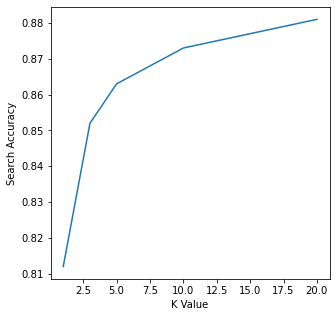

In [25]:
print('\nThe following is Inception model result:\n')
plot_model_history(Inception_history, plot_figure = False, txt_log = False, search_result = True, Is_CNNCL = False)

#### 4.4.3 Model Analysis
The resulted learning curves show that the model converges and stabilize at the 30th epoch. It achieves 89% accuracy on Real-world Image Classification, 91% accuracy on Quickdraw Image Classification. When we implement sketch-based image search engine using features from Inception Network, the top-3 search accuracy is 85.2%. 

Though the learning curves of Quickdraw show overfitting behaviours, the above results demonstrate that Inception Network is powerful in both image classification and feature extraction. The best results in sketch-based image search tasks are attributed to the complexity of the model and the well-designed inception blocks. 

### 4.5 CNN


In this subsection, we implement one of the most fundamental model —— Convolutional Neural Networks (CNN).
We will go through model strucuture, model performance (including train and validation loss and accuracy), and finally the search engine accuracy using CNN. At the end of this subsection, we analyze the model performance.

#### Model Structure

The structure of CNN is shown below. 



![CNN_structure](./fig/CNN_structure.png)

The architecture basically consists of a feature detector and a classifier.

The feature detector of the model involves stacking convolutional layers with small 3×3 filters followed by a max pooling layer. Together, these layers form a block, and these blocks can be repeated where the number of filters in each block is increased with the depth of the network. Padding is used on the convolutional layers to ensure the height and width of the output feature maps matches the inputs. Each layer will use the ReLU activation function, which is generally best practice.

The classifier of the model then interprets the features and makes a prediction as to which class a given image belongs. First, the feature maps output from the feature extraction of the model are flattened. Second, we interpret them with one fully connected layers, and then output a prediction. 

Additionally, for the consideration of overfitting problem on these small datasets, we involves dropout in the model. 
we evaluates the effect of different dropout rate on the model performance, as shown in the table below. Comparing the results of different dropout rate, we find that the model with 0.1 dropout rate achieves a balanced good erformance on both realworld images and sketch images, therefore we determine this dropout rate in our final model.



|            Dropout Rate          |      0     |     0.1    |     0.2    |     0.3    |
|:--------------------------------:|:----------:|:----------:|:----------:|:----------:|
|     Real-world Image Accuracy    |     86%    |     90%    |     85%    |     85%    |
|       Sketch Image Accuracy      |     86%    |     90%    |     89%    |     91%    |

#### Model Train and Validation Results

In [26]:
device = "cuda" if torch.cuda.is_available() else "cpu"
CNN = CNN_original(7).to(device)
# CNN.load_state_dict(torch.load('./model/xxx.pth'))

In [27]:
print('CNN Stucture:')
summary(CNN)
print('')

CNN Stucture:
Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            448
├─Conv2d: 1-2                            2,320
├─Conv2d: 1-3                            4,640
├─Conv2d: 1-4                            9,248
├─Conv2d: 1-5                            18,496
├─Conv2d: 1-6                            36,928
├─Conv2d: 1-7                            73,856
├─Conv2d: 1-8                            147,584
├─Flatten: 1-9                           --
├─Dropout: 1-10                          --
├─Linear: 1-11                           903
Total params: 294,423
Trainable params: 294,423
Non-trainable params: 0



In [28]:
CNN_history = load_model_history('./results/CNN.pkl')

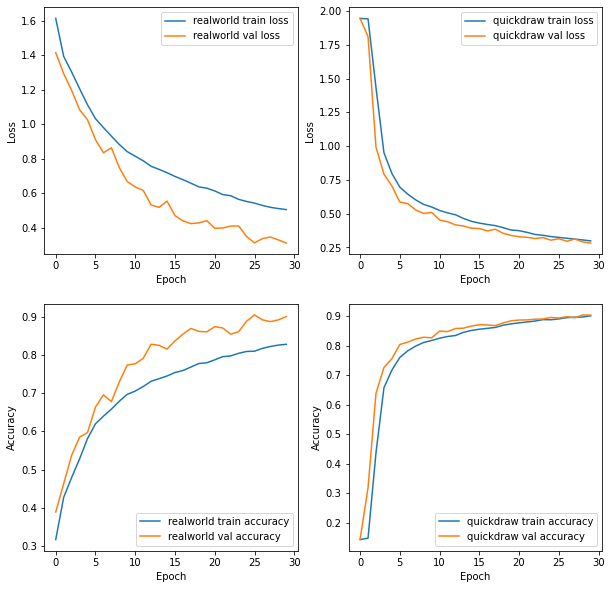

In [29]:
plot_model_history(CNN_history, plot_figure = True, txt_log = False, search_result = False, Is_CNNCL = False)

In [30]:
print('\nThe following is CNN model result:\n')
print('If you want plot more epoch results, please change the following epoch_num! \n')
plot_model_history(CNN_history, epoch_num = 5, plot_figure = False, txt_log = True, search_result = False, Is_CNNCL = False)


The following is CNN model result:

If you want plot more epoch results, please change the following epoch_num! 

--------------------------------------- Real-World Model --------------------------------------
Epoch  0 : Train Loss: 1.6123| Val Loss: 1.4132| Train Accuracy: 0.3161| Val Accuracy: 0.3883
Epoch  1 : Train Loss: 1.3923| Val Loss: 1.2926| Train Accuracy: 0.4269| Val Accuracy: 0.4627
Epoch  2 : Train Loss: 1.3023| Val Loss: 1.1955| Train Accuracy: 0.4788| Val Accuracy: 0.5371
Epoch  3 : Train Loss: 1.2055| Val Loss: 1.0835| Train Accuracy: 0.5278| Val Accuracy: 0.5849
Epoch  4 : Train Loss: 1.1120| Val Loss: 1.0255| Train Accuracy: 0.5813| Val Accuracy: 0.5971


--------------------------------------- QuickDraw Model --------------------------------------
Epoch  0 : Train Loss: 1.6123| Val Loss: 1.4132| Train Accuracy: 0.1422| Val Accuracy: 0.1429
Epoch  1 : Train Loss: 1.3923| Val Loss: 1.2926| Train Accuracy: 0.1470| Val Accuracy: 0.3184
Epoch  2 : Train Loss: 1.3023| Val


The following is CNN model result:

--------------------------------------- Search Engine Result --------------------------------------
Find Top  1  Similar Real-world Images for One Sketch: Accuracy: 0.6860
Find Top  3  Similar Real-world Images for One Sketch: Accuracy: 0.7520
Find Top  5  Similar Real-world Images for One Sketch: Accuracy: 0.7830
Find Top 10  Similar Real-world Images for One Sketch: Accuracy: 0.8130
Find Top 20  Similar Real-world Images for One Sketch: Accuracy: 0.8230




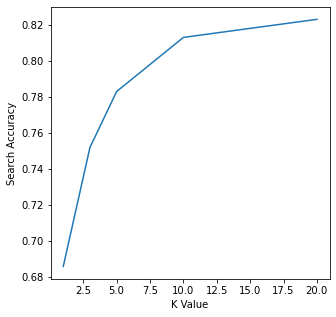

In [31]:
print('\nThe following is CNN model result:\n')
plot_model_history(CNN_history, plot_figure = False, txt_log = False, search_result = True, Is_CNNCL = False)

#### Model Analysis

The resulted learning curves show that the model converges and stabilize at the 20th epoch. It achieves 89.83% accuracy on Real-world Image Classification, 90.10% accuracy on Quickdraw Image Classification. When we implement sketch-based image search engine using features from CNN, the top-3 search accuracy is 75.2%. 

This results demonstrate that CNN is a simple but effective model for image classification tasks. Yet comparing sketch-based image search accuracy with other models, CNN does not perform very well, which indicates that we need a more strong model for image feature extraction.

### 4.6 CNN with Contrastive Loss

In this section, we improve CNN performance by introducing contrastive loss. The model structure is as follows: 
![demo](./fig/CNNCL.png)

The goal of contrastive loss is to discriminate the features of the input vectors. We will pull together the features from the same class, and push away the features from the different class. The formula of  Contrastive Loss is: . 

$$
\text { loss }=-\log \frac{\sum_{\text {label }_i=\text { label }_j} \exp \left(\operatorname{sim}\left(f_i, f_j\right) / \tau\right)}{\sum_k \exp \left(\operatorname{sim}\left(f_i, f_k\right) / \tau\right)}  (1)
$$
where $f$ represents image features and $\tau$ represents temperature in Contrastive loss formula.

We add three CL losses in CNN, shown in above figure with orange, blue and grean color. We use $M$ represents Model and $x$ represents input images.

In CL loss1, $f = f_{realworld} = M_{realworld}(x_{realworld})$ represents image features of real-world images.

In CL loss2, $f = f_{sketch} = M_{sketch}(x_{sketch})$ represents image features of sketch images.

In CL loss3, $f = f_{realworld} \times f_{sketch}$ represents the product of real-world image featrues and quickdraw image featrues.

Loss 3 is important because it takes the product of the real-world image feature and sketch images, which means it will pull together the real-world images and sketch images with the same label. It can significantly improve our search engine performance.

In [32]:
device = "cuda" if torch.cuda.is_available() else "cpu"
CNN_CL = CNNCL().to(device)
CNN_CL.load_state_dict(torch.load('./model/CNNCL.pth'))

<All keys matched successfully>

In [33]:
print('CNN with Contrastive Loss:')
summary(CNN_CL)
print('')

CNN with Contrastive Loss:
Layer (type:depth-idx)                   Param #
├─CNN: 1-1                               --
|    └─Sequential: 2-1                   --
|    |    └─Sequential: 3-1              1,920
|    |    └─Sequential: 3-2              37,056
|    |    └─Sequential: 3-3              74,112
|    |    └─Sequential: 3-4              147,840
|    |    └─Sequential: 3-5              221,760
|    |    └─Sequential: 3-6              332,352
|    |    └─Sequential: 3-7              443,136
|    |    └─Sequential: 3-8              590,592
|    |    └─AdaptiveAvgPool2d: 3-9       --
|    └─Linear: 2-2                       1,799
|    └─Dropout: 2-3                      --
├─CNN2: 1-2                              --
|    └─Sequential: 2-4                   --
|    |    └─Sequential: 3-10             1,920
|    |    └─Sequential: 3-11             37,056
|    |    └─Sequential: 3-12             74,112
|    |    └─Sequential: 3-13             147,840
|    |    └─Sequential: 3-14     

#### Model Train and Validation Results

In [34]:
CNNCL_history = load_model_history('./results/CNNCL.pkl')

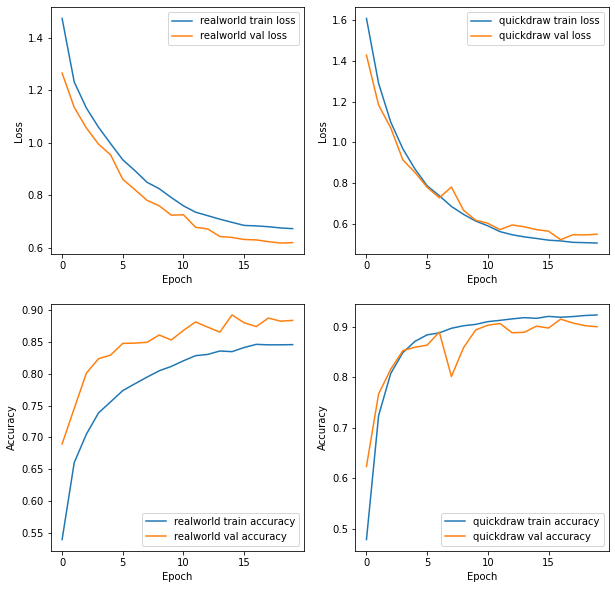

In [35]:
plot_model_history(CNNCL_history, plot_figure = True, txt_log = False, search_result = False, Is_CNNCL = False)

In [36]:
print('\nThe following is CNN with Contrastive Loss model result:')
print('If you want plot more epoch results, please change the following epoch_num! \n')
plot_model_history(CNNCL_history, epoch_num = 5, plot_figure = False, txt_log = True, search_result = False, Is_CNNCL = False)


The following is CNN with Contrastive Loss model result:
If you want plot more epoch results, please change the following epoch_num! 

--------------------------------------- Real-World Model --------------------------------------
Epoch  0 : Train Loss: 1.4749| Val Loss: 1.2663| Train Accuracy: 0.5394| Val Accuracy: 0.6896
Epoch  1 : Train Loss: 1.2322| Val Loss: 1.1355| Train Accuracy: 0.6604| Val Accuracy: 0.7454
Epoch  2 : Train Loss: 1.1331| Val Loss: 1.0569| Train Accuracy: 0.7049| Val Accuracy: 0.8009
Epoch  3 : Train Loss: 1.0598| Val Loss: 0.9953| Train Accuracy: 0.7384| Val Accuracy: 0.8234
Epoch  4 : Train Loss: 0.9969| Val Loss: 0.9540| Train Accuracy: 0.7558| Val Accuracy: 0.8293


--------------------------------------- QuickDraw Model --------------------------------------
Epoch  0 : Train Loss: 1.4749| Val Loss: 1.2663| Train Accuracy: 0.4791| Val Accuracy: 0.6237
Epoch  1 : Train Loss: 1.2322| Val Loss: 1.1355| Train Accuracy: 0.7241| Val Accuracy: 0.7669
Epoch  2 : Tr


The following is CNN with Contrastive Loss model result:

--------------------------------------- Search Engine Result --------------------------------------
Find Top  1  Similar Real-world Images for One Sketch: Accuracy: 0.7970
Find Top  3  Similar Real-world Images for One Sketch: Accuracy: 0.8221
Find Top  5  Similar Real-world Images for One Sketch: Accuracy: 0.8286
Find Top 10  Similar Real-world Images for One Sketch: Accuracy: 0.8441
Find Top 20  Similar Real-world Images for One Sketch: Accuracy: 0.8407




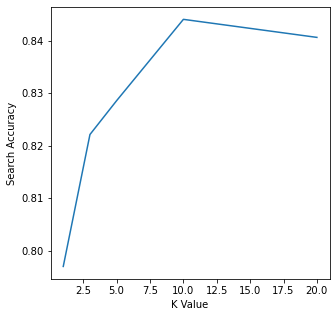

In [37]:
print('\nThe following is CNN with Contrastive Loss model result:\n')
plot_model_history(CNNCL_history, plot_figure = False, txt_log = False, search_result = True, Is_CNNCL = False)

#### Model Analysis

For CNN with contrastive loss, since we add contrastive loss to discriminate the features of the input vectors. For real-world images and sketches, it will pull together the images with the same label, and push away the images with different labels. Compared to original CNN, CNN with Contrastive Loss actually improve 20% accuracy on searching real-world images.

|     Top-k Real-world Images Accuracy    |       CNN     |     CNN with CL    |
|:---------------------------------------:|:-------------:|:------------------:|
|                     1                   |     56.70%    |        79.70%      |
|                     3                   |     59.20%    |        82.21%      |
|                     5                   |     61.60%    |        82.26%      |
|                    10                   |     63.70%    |        84.41%      |
|                    20                   |     66.40%    |        84.07%      |

# Conclusion

The Accuracy of Search Engine for different K values


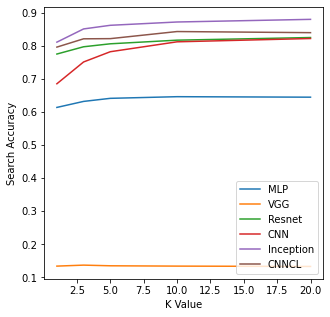

In [38]:
print('The Accuracy of Search Engine for different K values')
plot_all_accuracy()

Based on results, the Inception model achieve the highest accuracy due to its well-organized inception blocks, which allows the network to look at the same data with different receptive fields.  ResNet bottleneck layers encourages our model to compress salient features for the target variable to best fit in the available space in our case. Our proposed CNN with Contrastive Loss gains significant improvement compared to other baselines.

# Future Improvement

In the future, we plan to collect dataset with more images and various categories. Then, we can improve the model performance and extend the project application areas. We hope the search engine can be appplied in real application.

# Contribution

- Wu Zhanxin (A0250605N): Data Preprocessing, MLP, CNN with COntrastive Loss Implementation and Analyze
- Guo Peihan (A0248746N): Data Collection, ReNet, VGG16 Implementation and Analyze
- Fan Yehan (A0255928N): Data Exploration, Inception, simple CNN Implementation and Analyze
